# Data  and Preprocessing

In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Math packages
import pandas as pd
import numpy as np
import math

#Graph
import networkx as nx

In [2]:
languageDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Language').drop('Languages', axis=1)
leaderDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Leadership').drop('Lead. Styles', axis=1)
learningDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Learning').drop('Learn. Styles', axis=1)
likesDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Like')
dislikesDF = pd.read_excel('Frances_Material/MaximizingTeamDiversityData.xlsx', sheet_name='Dislikes')

studentDF = languageDF.join(leaderDF).join(learningDF).join(likesDF).join(dislikesDF).drop(['Students'])

In [3]:
#undoing unessecary 1-hot encoding

studentDF['leadershipStyle'] = studentDF.filter(['Amiable','Expressive','Analytical','Driver']).idxmax(1)
studentDF['learningStyle'] = studentDF.filter(['ref-int-vrb-seq','act-int-vrb-seq', 'ref-sns-vrb-seq',
 'act-sns-vrb-seq',
 'ref-int-vis-seq',
 'act-int-vis-seq',
 'ref-sns-vis-seq',
 'act-sns-vis-seq',
 'ref-int-vrb-glo',
 'act-int-vrb-glo',
 'ref-sns-vrb-glo',
 'act-sns-vrb-glo',
 'ref-int-vis-glo',
 'act-int-vis-glo',
 'ref-sns-vis-glo',
 'act-sns-vis-glo']).idxmax(1)
studentDF = studentDF.drop(['Amiable','Expressive','Analytical','Driver','ref-int-vrb-seq','act-int-vrb-seq', 'ref-sns-vrb-seq',
 'act-sns-vrb-seq',
 'ref-int-vis-seq',
 'act-int-vis-seq',
 'ref-sns-vis-seq',
 'act-sns-vis-seq',
 'ref-int-vrb-glo',
 'act-int-vrb-glo',
 'ref-sns-vrb-glo',
 'act-sns-vrb-glo',
 'ref-int-vis-glo',
 'act-int-vis-glo',
 'ref-sns-vis-glo',
 'act-sns-vis-glo'], axis=1)

In [4]:
likeColumn = []
dislikeColumn = []

for i in studentDF.loc[:, 'Student-1Like':'Student-96Like']:
    likeColumn.append(studentDF[i].sum())
    
for i in studentDF.loc[:, 'Student-1Dislikes':'Student-96Dislikes']:
    dislikeColumn.append(studentDF[i].sum())

studentDF['totalLikes'] = likeColumn
studentDF['totalDislikes'] = dislikeColumn
studentDF['likeDelta'] = studentDF['totalLikes'] - studentDF['totalDislikes']

# Graph Building

In [5]:
# Graph time! (this is student likes)
L = nx.DiGraph()
L.add_nodes_from(studentDF.index.values)

for i in studentDF.loc[:, 'Student-1Like':'Student-96Like']:
    for j in studentDF.index:
        if(studentDF.loc[j][i] == 1):
            L.add_edge(j, i[:-4])

In [6]:
# Graph time! (this is a directed student dislikes)
D = nx.DiGraph()
D.add_nodes_from(studentDF.index.values)

for i in studentDF.loc[:, 'Student-1Dislikes':'Student-96Dislikes']:
    for j in studentDF.index:
        if(studentDF.loc[j][i] == 1):
            D.add_edge(j, i[:-4])

In [32]:
# Graph time! (this is undirected student dislikes)
D_U = nx.Graph()
D_U.add_nodes_from(studentDF.index.values)

for i in studentDF.loc[:, 'Student-1Dislikes':'Student-96Dislikes']:
    for j in studentDF.index:
        if(studentDF.loc[j][i] == 1):
            D_U.add_edge(j, i[:-8])

Student-1
Student-1
Student-2
Student-2
Student-2
Student-2
Student-2
Student-2
Student-3
Student-3
Student-3
Student-3
Student-3
Student-4
Student-4
Student-4
Student-4
Student-5
Student-5
Student-5
Student-5
Student-5
Student-5
Student-5
Student-6
Student-6
Student-6
Student-7
Student-7
Student-7
Student-7
Student-7
Student-8
Student-8
Student-9
Student-9
Student-9
Student-9
Student-10
Student-10
Student-10
Student-10
Student-11
Student-11
Student-12
Student-12
Student-12
Student-12
Student-12
Student-13
Student-13
Student-13
Student-13
Student-14
Student-14
Student-14
Student-15
Student-15
Student-16
Student-16
Student-16
Student-16
Student-16
Student-16
Student-16
Student-17
Student-17
Student-17
Student-18
Student-18
Student-18
Student-18
Student-18
Student-18
Student-18
Student-18
Student-19
Student-19
Student-19
Student-19
Student-19
Student-19
Student-19
Student-20
Student-20
Student-20
Student-21
Student-21
Student-21
Student-21
Student-21
Student-22
Student-22
Student-22
Stud

In [62]:
# Adamic-Adar Link Prediction for all non-existent edges in dislike graph
future_dislike = nx.adamic_adar_index(D_U)

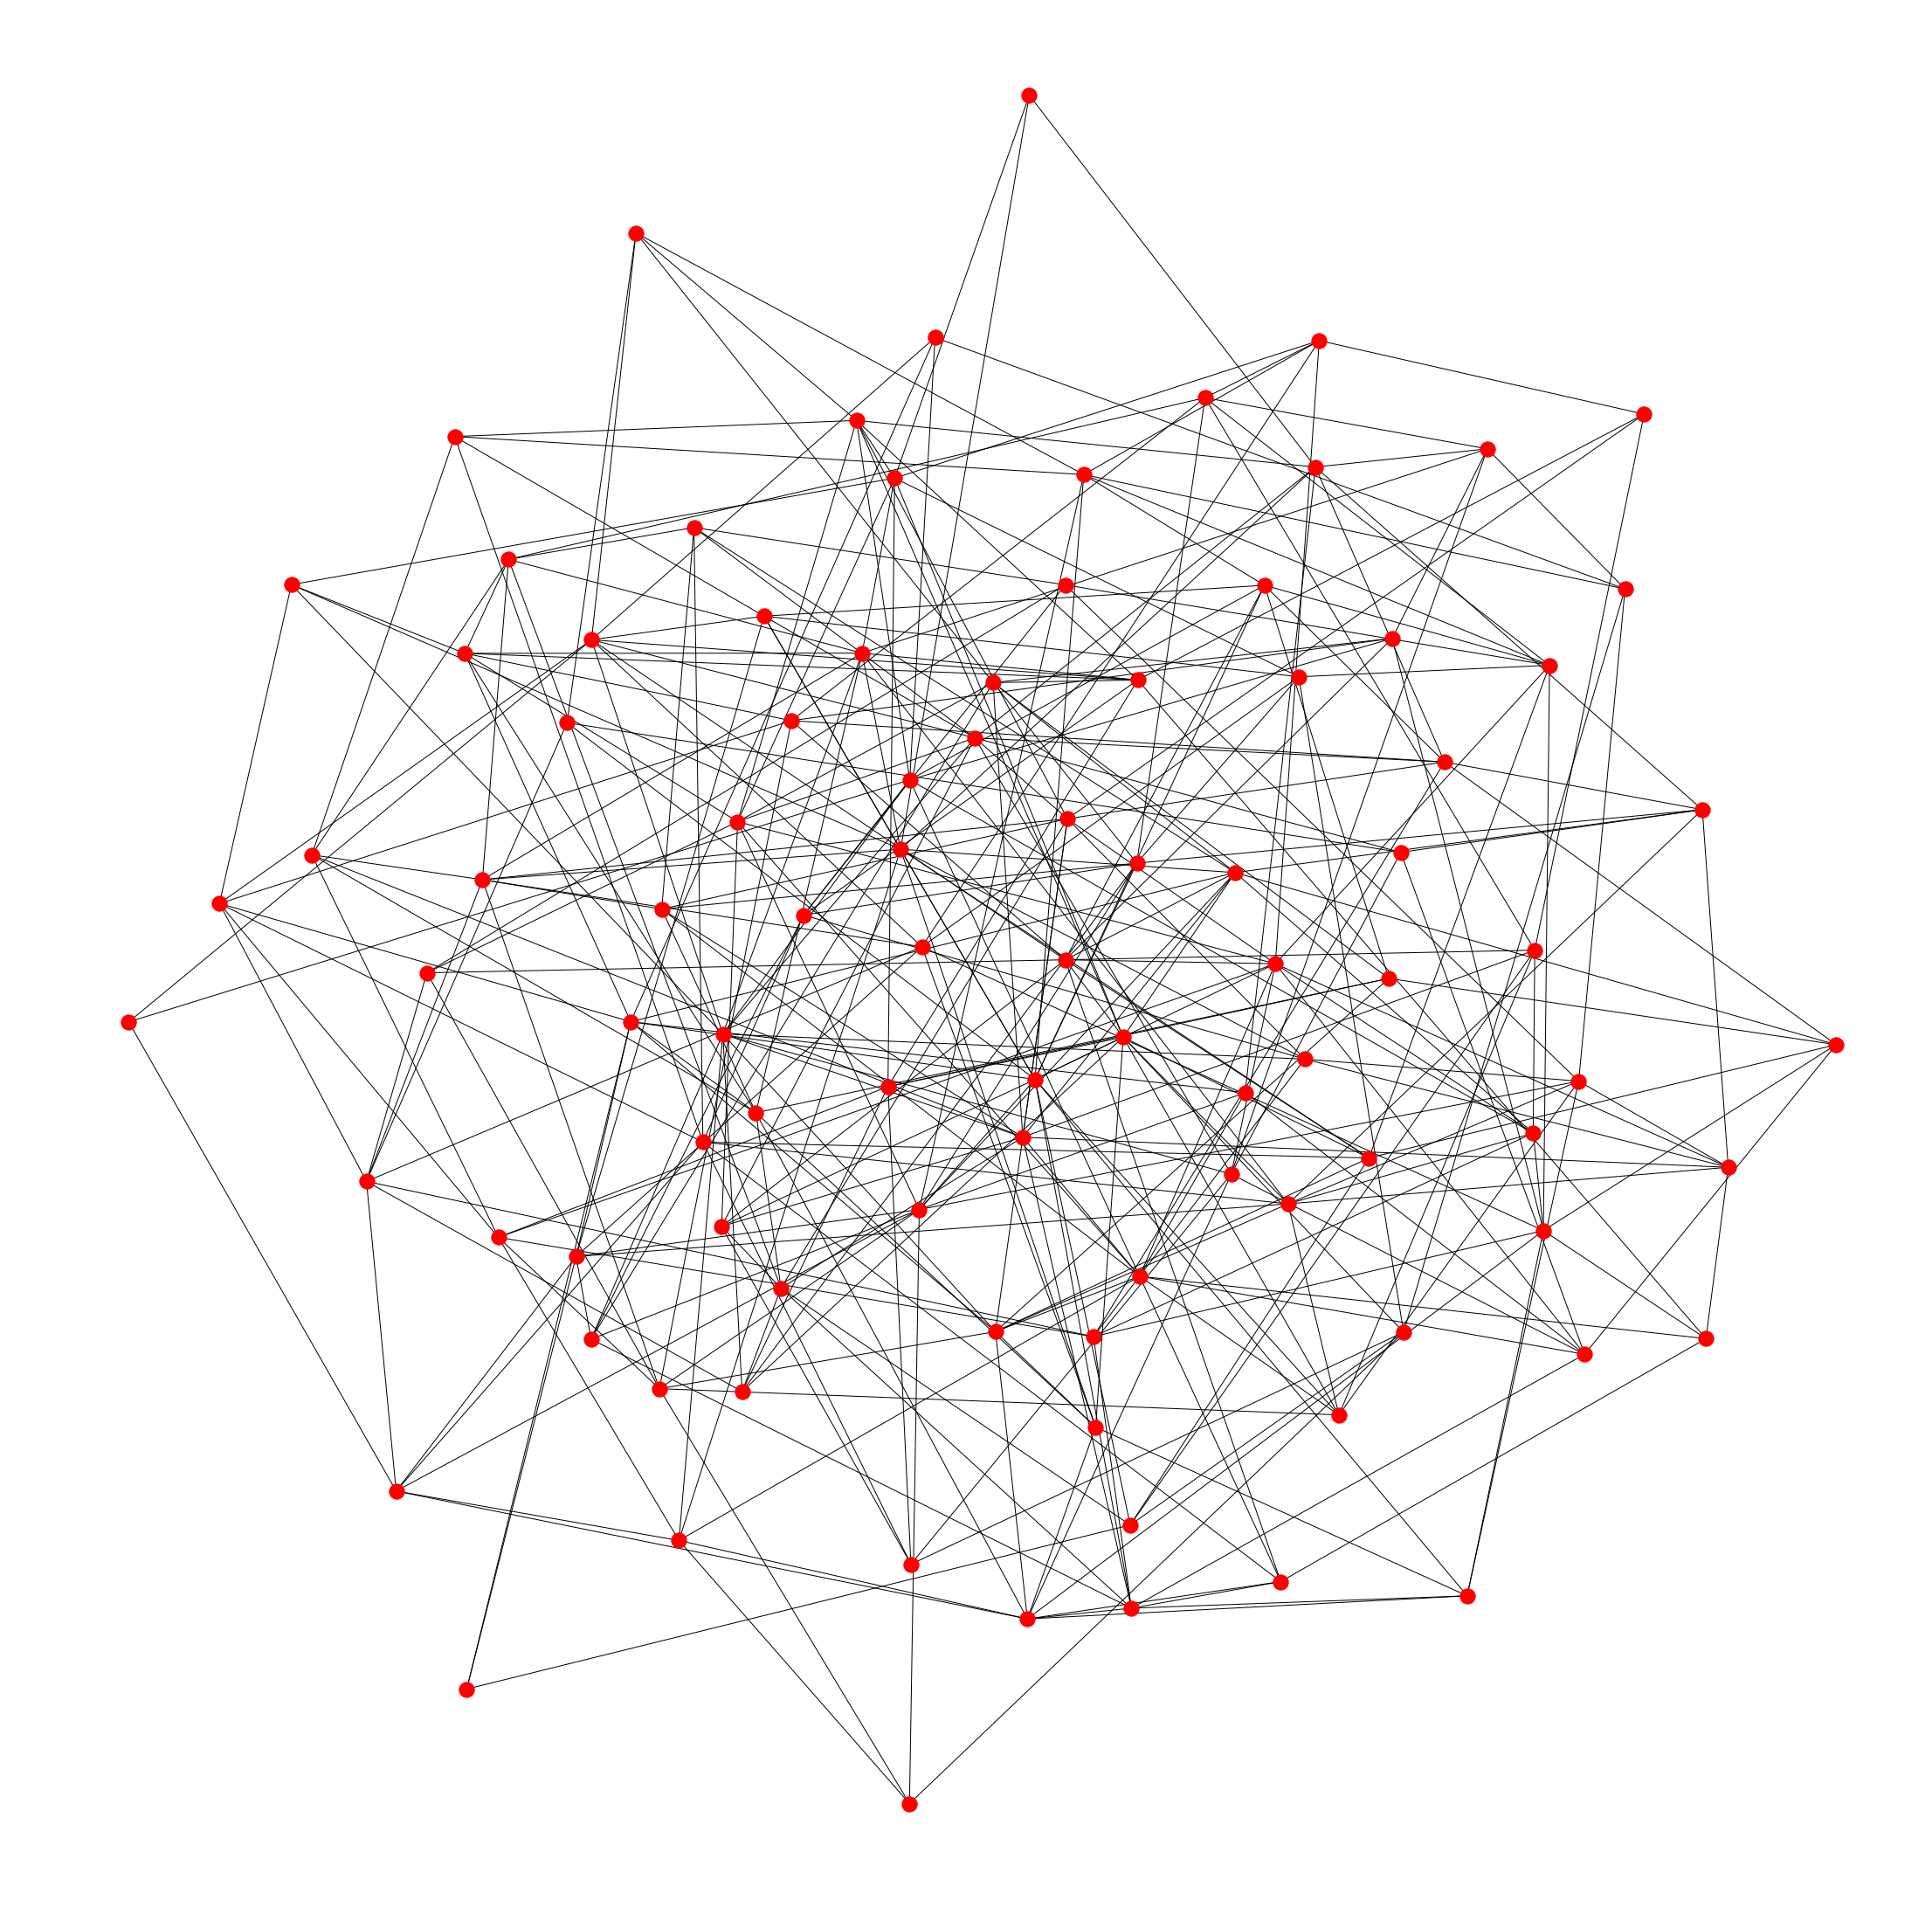

In [35]:
plt.figure(3, figsize=(30,30))
nx.draw(D_U, with_labels=False)

# Cluster Algoritm

In [87]:
def seedGenerator(inputDF, n):
    #currently uses a simple nsmallest function, could want to have randomization here for many trial runs?\
    return(list(inputDF.nsmallest(n, 'totalDislikes').index.values))

In [ ]:
def updateDislike():
    #this function updates the dislike_tracker for the new clusters, tracking the max dislike score for each student

In [ ]:
def addToCluster():
    #adds a student onto a cluster

In [ ]:
def 

In [105]:
seed = seedGenerator (studentDF, 5)
remaining = [x for x in list(studentDF.index.values) if x not in seed]

clusters = {}
for i in range(0,len(seed)):
    clusters[i] = []
    clusters[i].append(seed[i])
    
dislike_tracker = pd.DataFrame(columns = range(0,len(seed)), index = studentDF.index.values)
#[x for x in l1 if x not in l2]
#list_u = []
#[list_u.append(v) for v in list_1 if v not in list_u]

In [106]:
dislike_tracker

,0,1,2,3,4
Student-1,NaN,NaN,NaN,NaN,NaN
Student-2,NaN,NaN,NaN,NaN,NaN
Student-3,NaN,NaN,NaN,NaN,NaN
Student-4,NaN,NaN,NaN,NaN,NaN
Student-5,NaN,NaN,NaN,NaN,NaN
Student-6,NaN,NaN,NaN,NaN,NaN
Student-7,NaN,NaN,NaN,NaN,NaN
Student-8,NaN,NaN,NaN,NaN,NaN
Student-9,NaN,NaN,NaN,NaN,NaN
Student-10,NaN,NaN,NaN,NaN,NaN


In [63]:
for i in future_dislike:
    print(i)

('Student-84', 'Student-8', 0)
('Student-84', 'Student-13', 0)
('Student-84', 'Student-38', 0.43429448190325176)
('Student-84', 'Student-72', 0.45511961331341866)
('Student-84', 'Student-12', 0.43429448190325176)
('Student-84', 'Student-14', 0.6213349345596119)
('Student-84', 'Student-42', 0)
('Student-84', 'Student-27', 0)
('Student-84', 'Student-47', 0)
('Student-84', 'Student-63', 0)
('Student-84', 'Student-62', 0)
('Student-84', 'Student-56', 0.43429448190325176)
('Student-84', 'Student-1', 0.45511961331341866)
('Student-84', 'Student-36', 0.40242960438184466)
('Student-84', 'Student-16', 0.40242960438184466)
('Student-84', 'Student-10', 0)
('Student-84', 'Student-35', 0)
('Student-84', 'Student-65', 0)
('Student-84', 'Student-20', 0)
('Student-84', 'Student-40', 0)
('Student-84', 'Student-69', 0)
('Student-84', 'Student-59', 0)
('Student-84', 'Student-90', 0)
('Student-84', 'Student-25', 0.9605402309330919)
('Student-84', 'Student-26', 0)
('Student-84', 'Student-3', 1.403312437586

('Student-81', 'Student-86', 0.6213349345596119)
('Student-81', 'Student-92', 0)
('Student-81', 'Student-22', 0.45511961331341866)
('Student-58', 'Student-80', 0.4170323914242463)
('Student-58', 'Student-8', 0)
('Student-58', 'Student-13', 0)
('Student-58', 'Student-38', 0.4170323914242463)
('Student-58', 'Student-72', 0)
('Student-58', 'Student-12', 0.4170323914242463)
('Student-58', 'Student-14', 0.5138983423697507)
('Student-58', 'Student-56', 0)
('Student-58', 'Student-36', 0)
('Student-58', 'Student-40', 1.072008968920998)
('Student-58', 'Student-59', 0.5138983423697507)
('Student-58', 'Student-26', 0.4170323914242463)
('Student-58', 'Student-15', 0)
('Student-58', 'Student-71', 0.5138983423697507)
('Student-58', 'Student-21', 0.5138983423697507)
('Student-58', 'Student-85', 0)
('Student-58', 'Student-52', 0)
('Student-58', 'Student-78', 0)
('Student-58', 'Student-44', 1.072008968920998)
('Student-58', 'Student-41', 0)
('Student-58', 'Student-83', 0.5581106265512472)
('Student-58'

('Student-94', 'Student-74', 0)
('Student-94', 'Student-28', 0.40242960438184466)
('Student-94', 'Student-37', 0)
('Student-94', 'Student-75', 0)
('Student-94', 'Student-95', 0.45511961331341866)
('Student-94', 'Student-79', 0)
('Student-94', 'Student-51', 0)
('Student-94', 'Student-50', 0.8048592087636893)
('Student-94', 'Student-5', 0.40242960438184466)
('Student-94', 'Student-86', 0)
('Student-94', 'Student-92', 0.40242960438184466)
('Student-94', 'Student-22', 0)
('Student-76', 'Student-80', 0)
('Student-76', 'Student-8', 0.5138983423697507)
('Student-76', 'Student-13', 0.48089834696298783)
('Student-76', 'Student-38', 0)
('Student-76', 'Student-72', 0)
('Student-76', 'Student-12', 0.43429448190325176)
('Student-76', 'Student-14', 0.45511961331341866)
('Student-76', 'Student-42', 0.5138983423697507)
('Student-76', 'Student-56', 0.43429448190325176)
('Student-76', 'Student-65', 0)
('Student-76', 'Student-40', 0.5138983423697507)
('Student-76', 'Student-69', 0)
('Student-76', 'Studen

('Student-95', 'Student-67', 0.43429448190325176)
('Student-95', 'Student-29', 0.40242960438184466)
('Student-95', 'Student-55', 0)
('Student-95', 'Student-65', 0)
('Student-95', 'Student-40', 0)
('Student-95', 'Student-69', 0.45511961331341866)
('Student-95', 'Student-89', 0)
('Student-95', 'Student-59', 0)
('Student-95', 'Student-43', 0)
('Student-95', 'Student-26', 0)
('Student-95', 'Student-9', 0.40242960438184466)
('Student-95', 'Student-70', 0.872152004737665)
('Student-95', 'Student-15', 0)
('Student-95', 'Student-74', 0)
('Student-95', 'Student-51', 0)
('Student-95', 'Student-33', 0.8894140952166705)
('Student-95', 'Student-79', 0)
('Student-95', 'Student-21', 0)
('Student-95', 'Student-50', 0.4170323914242463)
('Student-95', 'Student-5', 0.4170323914242463)
('Student-95', 'Student-52', 0)
('Student-95', 'Student-18', 0.45511961331341866)
('Student-95', 'Student-86', 0.48089834696298783)
('Student-95', 'Student-92', 0.40242960438184466)
('Student-95', 'Student-96', 0)
('Student